In [10]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

In [11]:
%matplotlib inline
data = pd.read_csv('C://Users//emb-ashwcho//Downloads/updateddriverdata.csv')

# Success
print( "Driver Behaviour dataset has {} data points with {} variables each.".format(*data.shape))

Driver Behaviour dataset has 200 data points with 11 variables each.


In [66]:
data.head()


,accelerate,brakes,speed,quality
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,6.998,18.7,2.94,33.4
3,7.147,18.7,5.33,36.2
4,6.012,15.2,12.43,22.9


In [65]:
features['brakes'].describe()

count    200.00000
mean      17.58850
std        2.26461
min       12.60000
25%       15.52500
50%       17.80000
75%       19.10000
max       21.20000
Name: brakes, dtype: float64

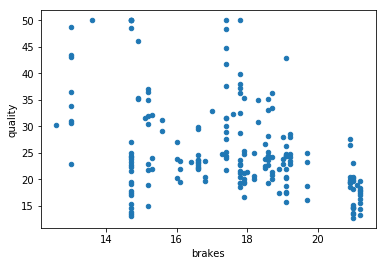

In [14]:
data[['brakes', 'quality']].plot.scatter(x='brakes', y='quality')

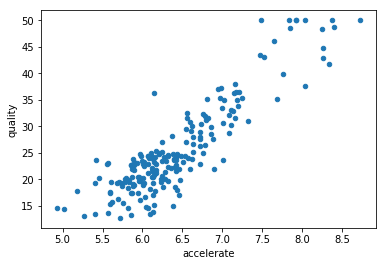

In [15]:
data[['accelerate', 'quality']].plot.scatter(x='accelerate', y='quality')

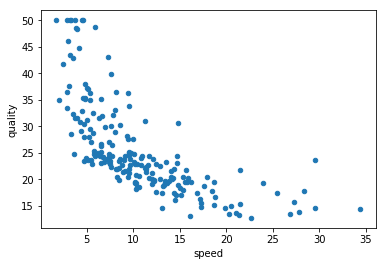

In [16]:
data[['speed', 'quality']].plot.scatter(x='speed', y='quality')

In [ ]:
my_list = data["brakes"].values
my_list  
my_list2 = data["accelerate"].values
my_list2  
my_list3 = data["speed"].values
my_list3  
joined=[my_list]+[my_list2]+[my_list3]
joined=pd.DataFrame(joined)
joined=joined.T
joined[0][0]

In [17]:
data.columns

Index(['latitutde', 'longitude', 's1', 'behaviour', 'q1', 'ac1', 'b1',
       'accelerate', 'brakes', 'speed', 'quality'],
      dtype='object')

In [27]:
data.drop(data.columns[[0,1,2,3,4,5,6]], axis=1, inplace=True)
data.head()

,accelerate,brakes,speed,quality
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,6.998,18.7,2.94,33.4
3,7.147,18.7,5.33,36.2
4,6.012,15.2,12.43,22.9


In [28]:
Quality = data['quality']
features = data.drop('quality', axis = 1)
    

In [29]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, Quality,
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=20)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


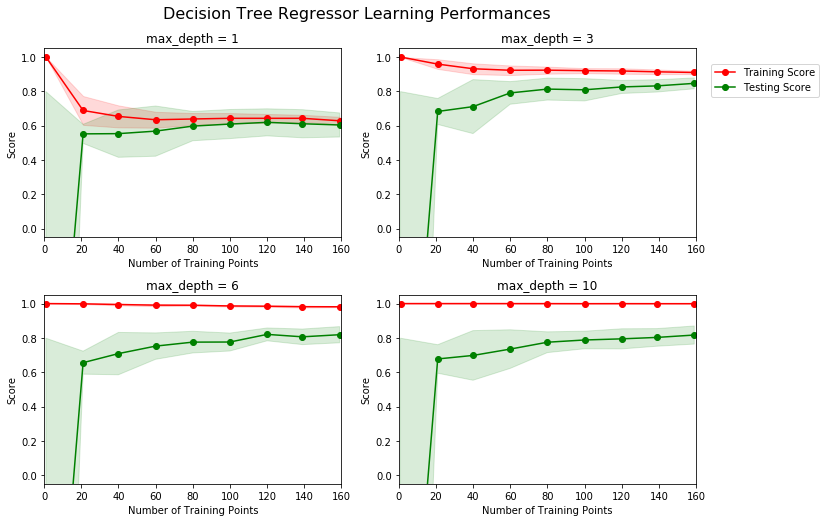

In [30]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, Quality)

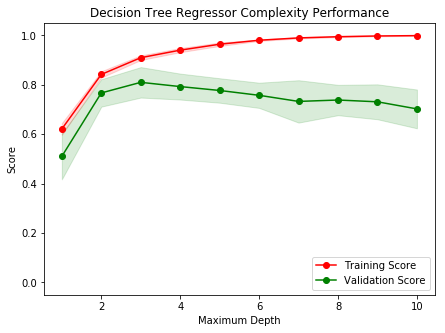

In [32]:
vs.ModelComplexity(X_train, y_train)


In [33]:
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [34]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [56]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [79]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


In [69]:
import matplotlib.pyplot as plt

# Produce a matrix for client data
driver_data = [[5, 17, 15], # driver 1
               [4, 32, 22], # driver  2
               [8, 3, 12]]  # driver  3

# Show predictions
for i, Quality in enumerate(reg.predict(driver_data)):
    #plt.hist(Quality)
    #plt.axvline(Quality)
    #plt.text(Quality-35000, 75, 'Client '+str(i+1), rotation=90)
    print("Predicted Quality for driver {} : {:,.2f}".format(i+1, Quality))

Predicted Quality for driver 1 : 20.35
Predicted Quality for driver 2 : 16.32
Predicted Quality for driver 3 : 35.20


In [68]:
#vs.PredictTrials(features, Quality, fit_model, driver_data)


In [86]:
data.head()

,accelerate,brakes,speed,quality
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,6.998,18.7,2.94,33.4
3,7.147,18.7,5.33,36.2
4,6.012,15.2,12.43,22.9


In [87]:
features

,accelerate,brakes,speed
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,6.998,18.7,2.94
3,7.147,18.7,5.33
4,6.012,15.2,12.43
5,6.377,15.2,20.45
6,6.009,15.2,13.27
7,5.889,15.2,15.71
8,5.949,21.0,8.26
9,6.096,21.0,10.26


In [80]:
data['quality'].describe()

count    200.000000
mean      25.500500
std        8.734162
min       12.700000
25%       19.600000
50%       23.350000
75%       29.525000
max       50.000000
Name: quality, dtype: float64

In [114]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)

In [ ]:
features = 

In [117]:
km.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [118]:
x = km.fit_predict(data)
x

array([1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 0,
       0, 3, 3, 3, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0,
       0, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 0, 3, 1, 1, 1, 3, 3, 1, 1,
       2, 1])

In [120]:
data["Cluster"]= x
data.head()

,accelerate,brakes,speed,quality,Cluster
0,6.575,15.3,4.98,24.0,1
1,6.421,17.8,9.14,21.6,1
2,6.998,18.7,2.94,33.4,3
3,7.147,18.7,5.33,36.2,3
4,6.012,15.2,12.43,22.9,1


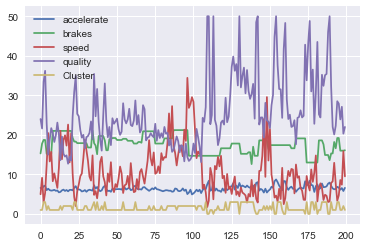

In [121]:
data.plot()

In [125]:
features1 = data.sort_values(['Cluster'])
features1.to_csv("features1cluster.csv")